In [288]:
import pandas as pd
import seaborn as sns

In [289]:
dataset = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [290]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1. ID - The data is for 5000 individuals
2. Age - varies from 23 to 67 for all
3. Experience - in years is -3 to 43 # which basically means exprience cannot be -3; will need to clean that and convert these to 0.
4. Income - from 8000 dollars to 224000 dollars with majority getting 64000 dollars
5. ZipCode - will have to check this one with distribution plot
6. Family - Family size is for a single individual to a family of 4
7. CCAvg - There are people who do not spend anything to people who spend upto 10000 dollars on the card
8. Education - Categorical distribution
9. Mortgage - Majority of the people i.e. 50% of less do not have any mortgage
10. Personal Loan - # categorical variable
11. Securities Account - categorical again
12. CD Account - categorical
13. Online - Majority do use internet banking
14. Credit Card - very few people use it i.e. 75% or less dont

In [291]:
dataset['Personal Loan'].value_counts()

# The dataset has 4520 people who did not accept the personal loan in the inital campaign VS 480 who did

0    4520
1     480
Name: Personal Loan, dtype: int64

In [292]:
dataset[dataset['Experience'] < 0]

# as you can see one thing that stands out for the people who have experience < 0 is age, they are all bw 29 to 23
# we can take the median age wise and then impute to those who have exp. < 0 accordingly

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [293]:
# define a dictionary for age and median
diff_ages = dataset['Age'].unique()

agedict = {}

for x in diff_ages:
    value = dataset[(dataset['Age'] == x) & (dataset['Experience'] >=0)].median()['Experience']
    if value >= 0: 
        agedict[x] = value # create a dictionary with median value for that age
    else: 
        agedict[x] = 0 #over write median exprience of negative with 0

print(agedict)

# I wanted to add median age wise.. but 23 was nan.. hence for all missing values or negatives imputed 0
# rest will impute the median as per age

{25: 1.0, 45: 20.0, 39: 14.0, 35: 10.0, 37: 12.0, 53: 28.0, 50: 25.0, 34: 9.0, 65: 40.0, 29: 4.0, 48: 23.0, 59: 34.0, 67: 42.0, 60: 35.0, 38: 13.0, 42: 17.0, 46: 21.0, 55: 30.0, 56: 31.0, 57: 32.0, 44: 19.0, 36: 11.0, 43: 18.0, 40: 15.0, 30: 5.0, 31: 5.0, 51: 26.0, 32: 7.0, 61: 36.0, 41: 16.0, 28: 3.0, 49: 24.0, 47: 22.0, 62: 37.0, 58: 33.0, 54: 29.0, 33: 8.0, 27: 2.0, 66: 41.0, 24: 0.0, 52: 27.0, 26: 1.0, 64: 39.0, 63: 38.0, 23: 0}


In [294]:
for index, row in dataset.iterrows():
    val = row['Experience']
    if row['Experience'] < 0:
        dataset.iloc[index, dataset.columns.get_loc('Experience')] = agedict[row['Age']]


In [295]:
dataset[dataset['Experience'] < 0]

# as you can see there are no experience values less than 0 now.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

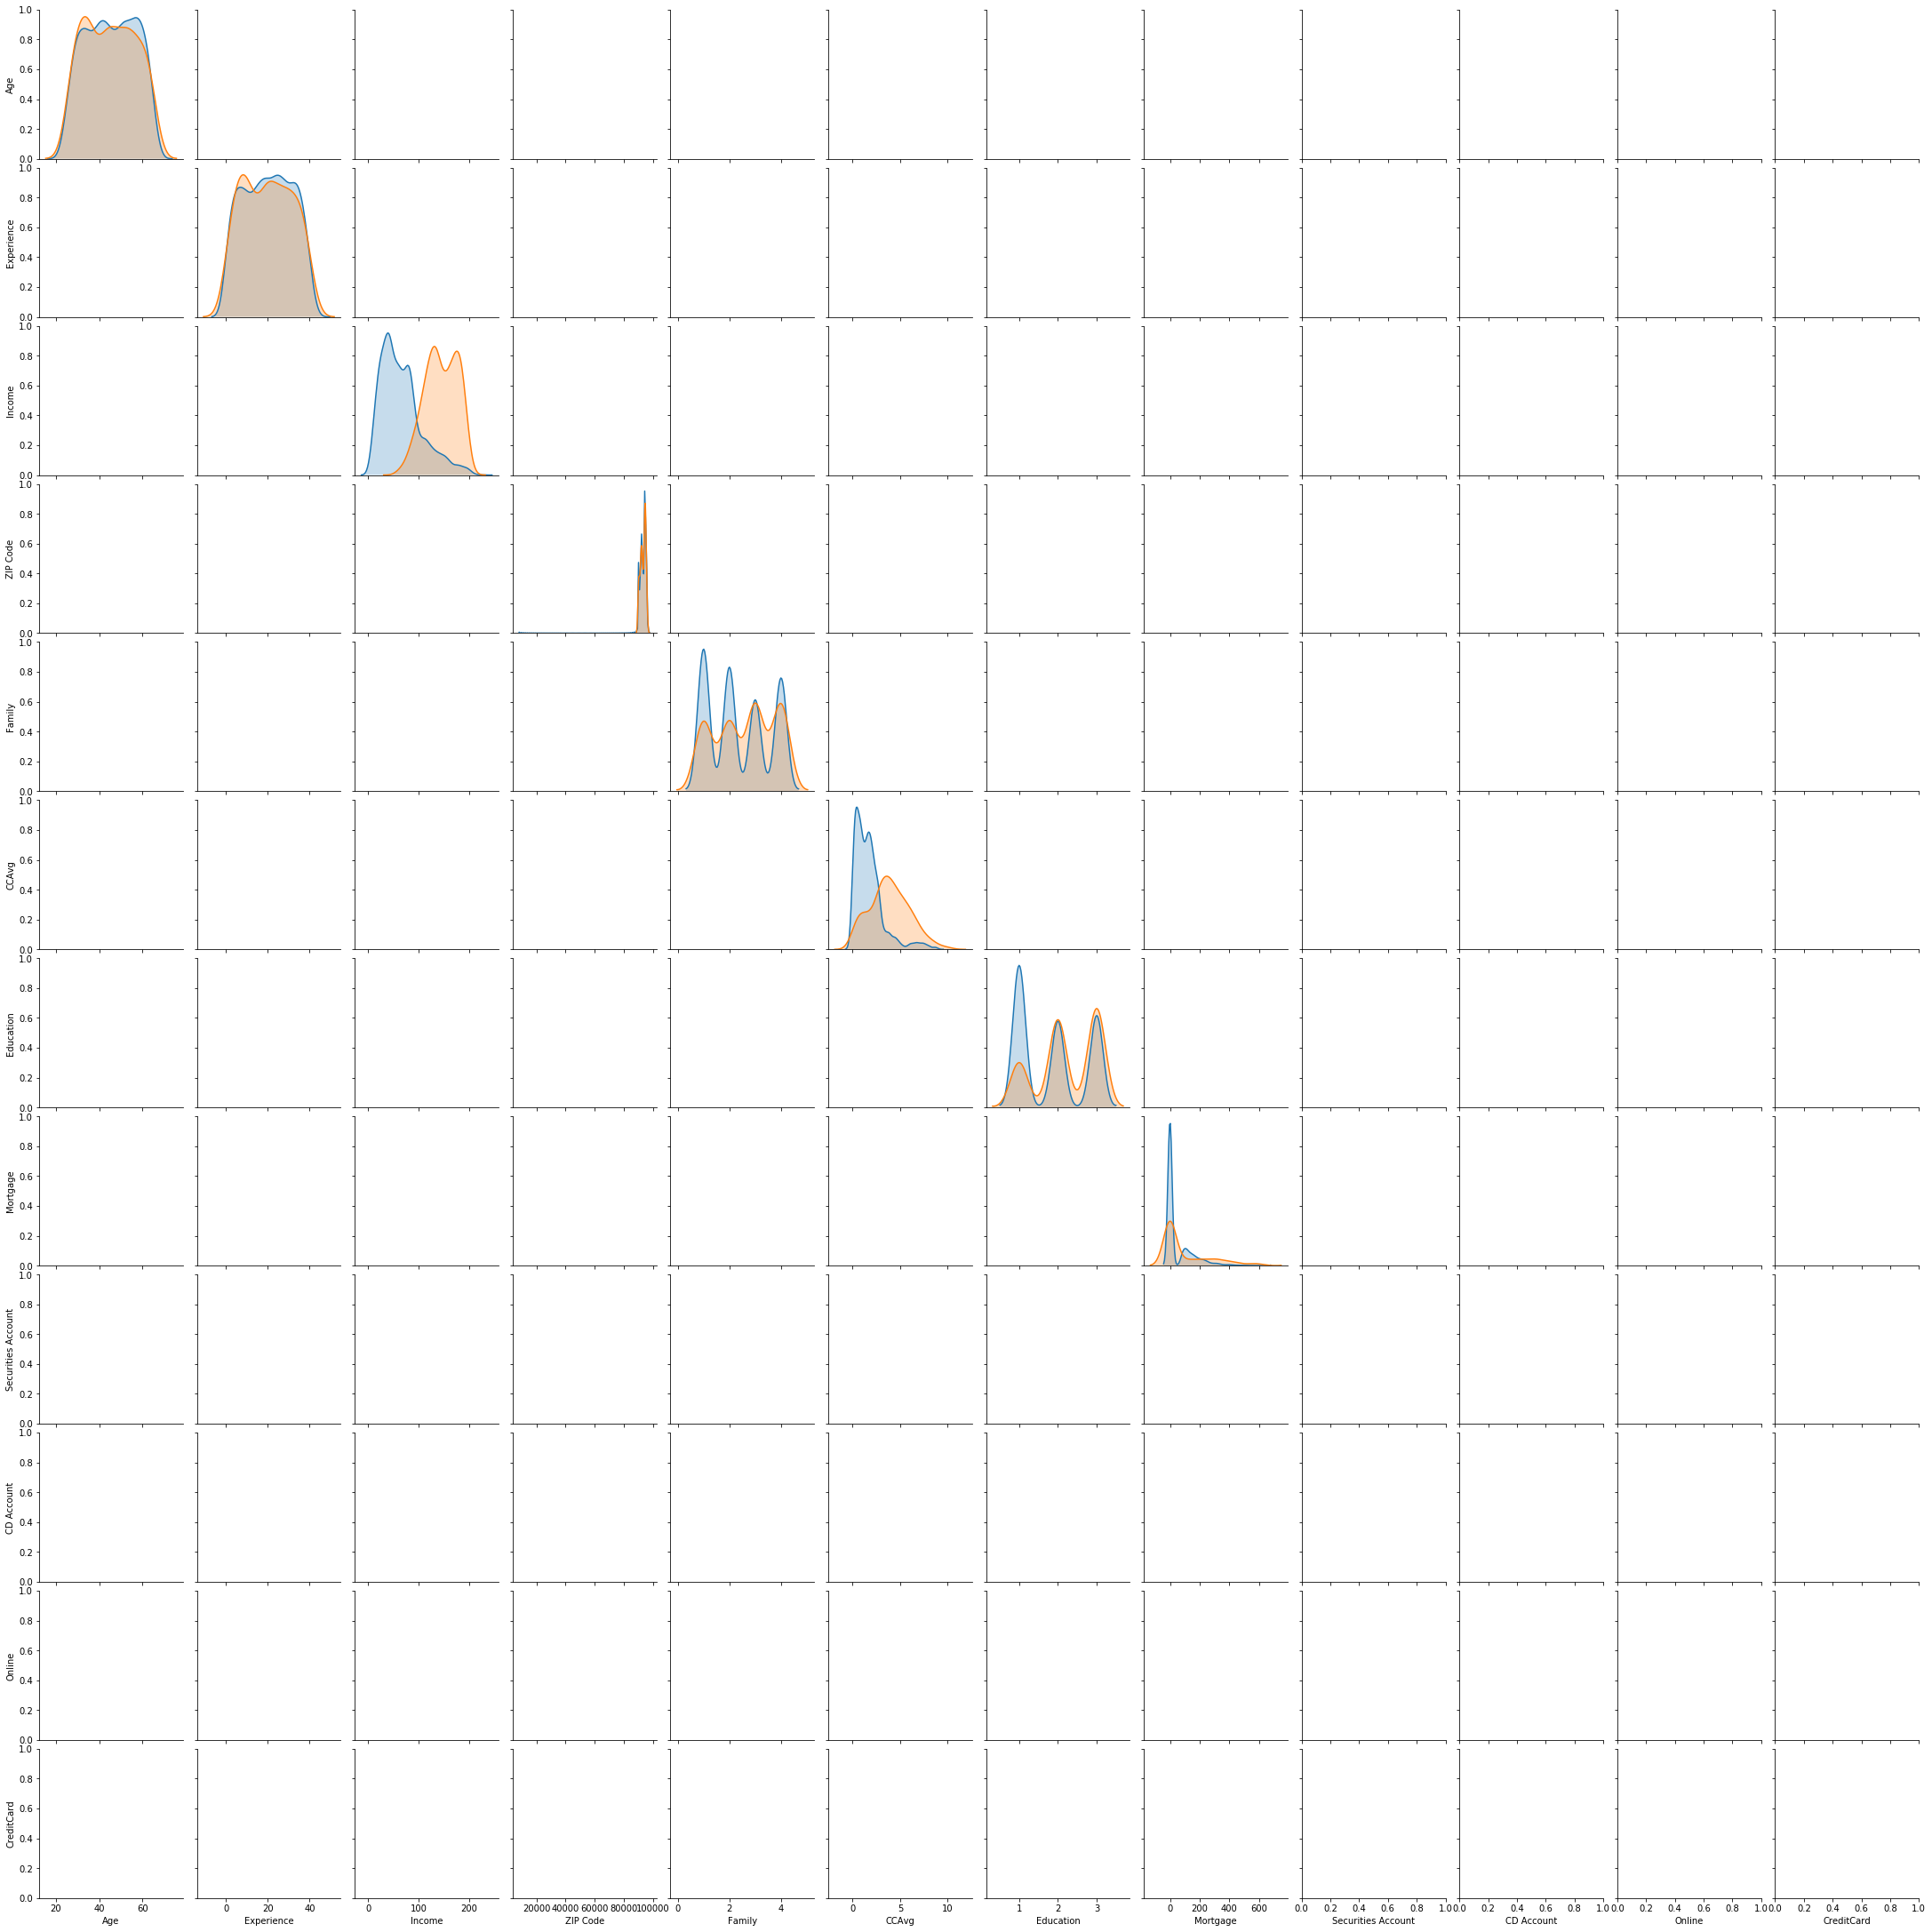

In [296]:
# Pairplot
snspairplot = dataset.drop('ID', axis = 1)
snspairplot['Personal Loan'] = snspairplot['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(snspairplot, hue = 'Personal Loan')

# for me pair pair plot is not working, hence I am not using it but going manually to do a distribution analysis

In [297]:
print(dataset.columns)

# dropping the ID columns
dataset = dataset.drop('ID',axis=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


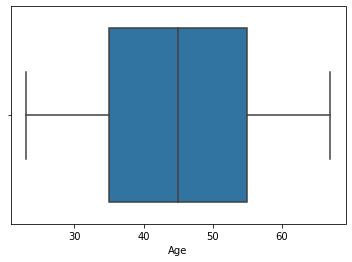

In [298]:
sns.boxplot(dataset['Age'])

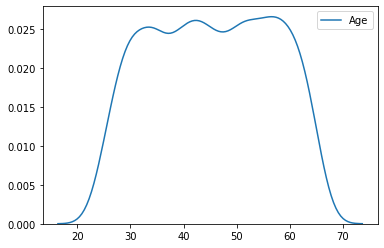

In [299]:
sns.kdeplot(dataset['Age'])

for age both seem normal and no outlier

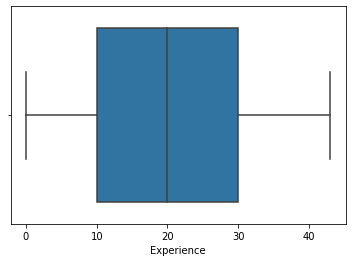

In [300]:
sns.boxplot(dataset['Experience'])

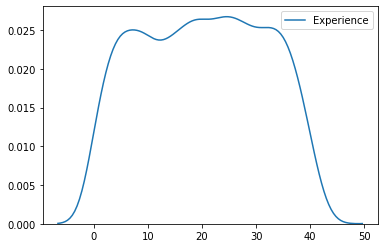

In [301]:
sns.kdeplot(dataset['Experience'])

again for experience nothing to Write Home about, no outliers all seem pretty obvious

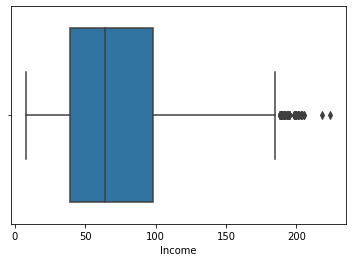

In [302]:
sns.boxplot(dataset['Income'])

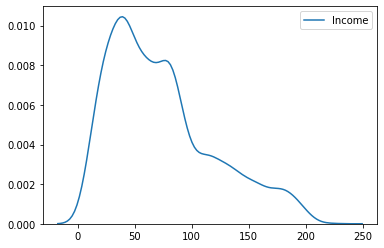

In [303]:
sns.kdeplot(dataset['Income'])

income is right skewed which means more people in the dataset are earnign less and this also goes with the boxplot distribution above. This ideally if you see is actually true in natural life as well.. hence no outliers

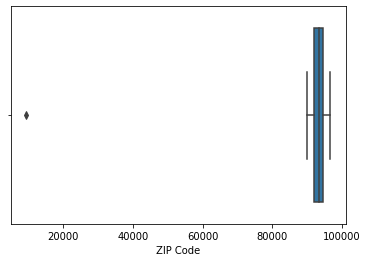

In [304]:
sns.boxplot(dataset['ZIP Code'])

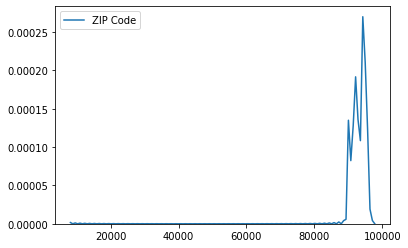

In [305]:
sns.kdeplot(dataset['ZIP Code'])

There is an outlier in the data which we can investigate and remove.. it is less than 20000 zip code

In [306]:
dataset[dataset['ZIP Code'] < 20000]
#  hence index position 384 can be dropped

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25.0,21,9307,4,0.6,3,0,0,0,0,1,1


In [307]:
dataset = dataset.drop(384, axis=0)

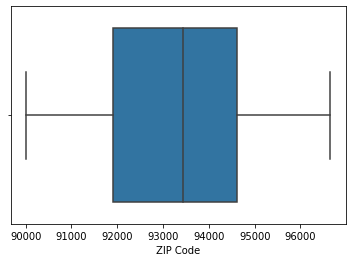

In [308]:
# plotting zip code again to check 
sns.boxplot(dataset['ZIP Code'])

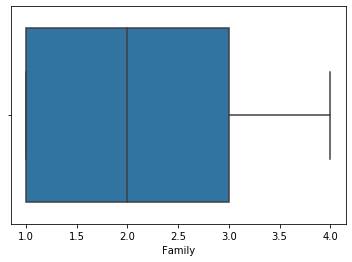

In [309]:
sns.boxplot(dataset['Family'])

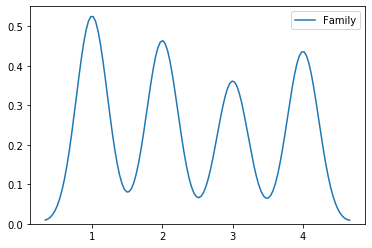

In [310]:
sns.kdeplot(dataset['Family'])

majority single individuals

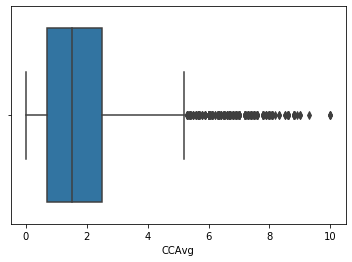

In [311]:
sns.boxplot(dataset['CCAvg'])

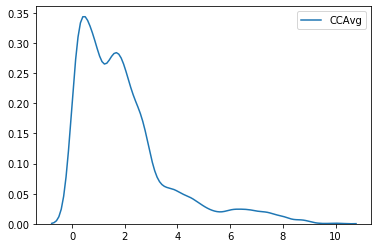

In [312]:
sns.kdeplot(dataset['CCAvg'])

Again natural distribution of the plot considering this is a spend and lesser people have more and vice versa

In [313]:
# Checking number of unique values for categorical columns
col = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
dataset[col].nunique()

ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [314]:
#drop zip code since it is a categorical variable but with 466 unique values, would not be helpful in predictions

dataset.drop('ZIP Code', axis=1, inplace = True)

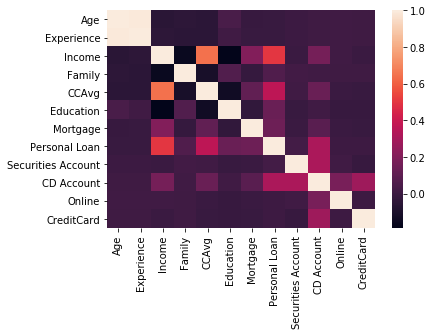

In [315]:
sns.heatmap(dataset.corr()) # had to plot correlation, box plot (outliers), and kdeplot (for distribution) seperately

In [316]:
corrTable = dataset.corr()
corrTable.style.background_gradient(cmap='coolwarm')

# 1. can drop both online and credit card, they have less than 1% correlation with personal loan
# 2. Age and Experince are inter-correlated pretty much, we can keep only 1.. dropping Age, experience is more correlated

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994214,-0.055164,-0.046566,-0.051941,0.041211,-0.012484,-0.007694,-0.000403,0.008068,0.013622,0.007530
Experience,0.994214,1.000000,-0.046789,-0.052250,-0.049969,0.013960,-0.010903,-0.008032,-0.001229,0.009927,0.013696,0.008943
Income,-0.055164,-0.046789,1.000000,-0.157232,0.645931,-0.187277,0.206712,0.502459,-0.002695,0.169703,0.014397,-0.002030
Family,-0.046566,-0.052250,-0.157232,1.000000,-0.109088,0.064581,-0.020294,0.061471,0.020094,0.014184,0.010127,0.011160
CCAvg,-0.051941,-0.049969,0.645931,-0.109088,1.000000,-0.135952,0.109829,0.366864,0.015035,0.136504,-0.003486,-0.006454
Education,0.041211,0.013960,-0.187277,0.064581,-0.135952,1.000000,-0.033186,0.136834,-0.010723,0.014004,-0.015227,-0.011432
Mortgage,-0.012484,-0.010903,0.206712,-0.020294,0.109829,-0.033186,1.000000,0.142065,-0.005449,0.089286,-0.005904,-0.007061
Personal Loan,-0.007694,-0.008032,0.502459,0.061471,0.366864,0.136834,0.142065,1.000000,0.021932,0.316344,0.006332,0.002903
Securities Account,-0.000403,-0.001229,-0.002695,0.020094,0.015035,-0.010723,-0.005449,0.021932,1.000000,0.317023,0.012685,-0.014926
CD Account,0.008068,0.009927,0.169703,0.014184,0.136504,0.014004,0.089286,0.316344,0.317023,1.000000,0.175935,0.278792


In [317]:
dataset.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)

In [318]:
dataset.columns
# dropped a total of 5 columns by now incl. ID, ZIP Code, Age, Online and Credit Card

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import  train_test_split


In [320]:
# split the dataset into X and Y
Y = dataset[['Personal Loan']]
X = dataset.drop('Personal Loan', axis=1)

In [321]:
# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3499 samples.
Testing set has 1500 samples.


In [322]:
# 1. Logistic Regression Without Feature Scaling

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')
roc = roc_auc_score(y_test, y_pred)
print(f'ROC accuracy: {roc}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

F1 score: 0.6772908366533865 and accuracy : 0.946
ROC accuracy: 0.7805053574284344
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1352
           1       0.83      0.57      0.68       148

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500

[[1334   18]
 [  63   85]]


C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [323]:
# 2. KNN Without Feature Scaling

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')
roc = roc_auc_score(y_test, y_pred)
print(f'ROC accuracy: {roc}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

F1 score: 0.45967741935483863 and accuracy : 0.9106666666666666
ROC accuracy: 0.6766652007036622
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1352
           1       0.57      0.39      0.46       148

    accuracy                           0.91      1500
   macro avg       0.75      0.68      0.71      1500
weighted avg       0.90      0.91      0.90      1500

[[1309   43]
 [  91   57]]


C:\Users\v.juneja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [324]:
# 3. Naive Bayes Without Feature Scaling

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')
roc = roc_auc_score(y_test, y_pred)
print(f'ROC accuracy: {roc}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score: 0.4914285714285714 and accuracy : 0.8813333333333333
ROC accuracy: 0.747641132256517
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1352
           1       0.43      0.58      0.49       148

    accuracy                           0.88      1500
   macro avg       0.69      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1236  116]
 [  62   86]]


In [325]:
# no do feature scaling and see the results

ScaledX = X.apply(zscore)

In [326]:
# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(ScaledX, Y, test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3499 samples.
Testing set has 1500 samples.


In [327]:
# 4. Logistic Regression WITH Feature Scaling

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')
roc = roc_auc_score(y_test, y_pred)
print(f'ROC accuracy: {roc}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

F1 score: 0.6559999999999999 and accuracy : 0.9426666666666667
ROC accuracy: 0.769630577322885
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1352
           1       0.80      0.55      0.66       148

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500

[[1332   20]
 [  66   82]]


C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [328]:
# 5. KNN WITH Feature Scaling

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')
roc = roc_auc_score(y_test, y_pred)
print(f'ROC accuracy: {roc}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

C:\Users\v.juneja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


F1 score: 0.774703557312253 and accuracy : 0.962
ROC accuracy: 0.8284923236846314
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1352
           1       0.93      0.66      0.77       148

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

[[1345    7]
 [  50   98]]


Now we would study the results in:

1. We will look at the confusion matrix to understand the number of False Positives and False Negatives that the algo's have categorized.

2. We will understand the confusion matrix with the help of a couple of metrics which include:

- Recall Score - When it is actually positive, how often does the model predict that i.e. limit false negatives
- Precision Score - When it predicts positive result, how often is it correct i.e. less false positives
- F1 Score - mean of both precision and recall
- Accuracy - accuracy % of the model on the test set

The model that balances all the four above is the correct model to be deployed further:

Numbers are as - Accuracy, F1 Score, Precision, Recall
1. Logistic Regression - 94.6%; 67.7%; 83%; 57%
2. KNN - 91%; 45%; 57%; 39%
3. Naive Bayes - 88.13%; 49%; 43%; 58%

4. Logistic Regression with Feature Scaling - 94.2%; 65.6%; 80%; 55%
5. KNN with Feature Scaling - 96.2%; 77%; 93%, 66%

Now wiht the above it is absolutely clear that a KNN Algo with Feature Scaling is the best model to go with. Further optimizing K might improve the accuracy of the model further.

What this model tells us that:
1. It can predict individuals who will opt in for the personal loan offer 96.2% of the times
2. It is positive that the people whom it selects will 93% opt in for the personal loan (False positives are bare minimum)
3. It might say that someone will opt for the personal loan but only 66% of the times they would (for a bank campaign even if a person is sent a campaign and they don't opt for it, it is a conversion cost and there is not much harm)

K-Value optimization continues to be one thing which I am leaving on the table and for a full blown model even that would be optimized.